In [3]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak 

In [5]:

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
else:
  print("No GPU device found")

In [10]:
from tensorflow.python.eager.context import PhysicalDevice
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available:", len(pyhsical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available: 1


In [12]:
(x_train , y_train), (x_test, y_test)=mnist.load_data()
print (x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [13]:
print(y_train.shape)

(60000,)


In [14]:
print(y_train[:3])

[5 0 4]


In [16]:
#initializing the image classifier
clf=ak.ImageClassifier(
  overwrite=True, 
  max_trials=1
)
#feeding the image classifier with training data 
history=clf.fit(x_train, y_train)

Trial 1 Complete [00h 03m 42s]
val_loss: 0.04062845930457115

Best val_loss So Far: 0.04062845930457115
Total elapsed time: 00h 03m 42s
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1555 - accuracy: 0.9523
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0741 - accuracy: 0.9768
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0598 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0507 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0445 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0415 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0366 - accuracy: 0.9882
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0344 - accuracy: 0.9887
Epoch 9/10
1875/1875 [=====================

In [18]:
model= clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

In [27]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
  fig, axes= plt.subplots(1, 10, figsize=(20,20))
  axes=axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


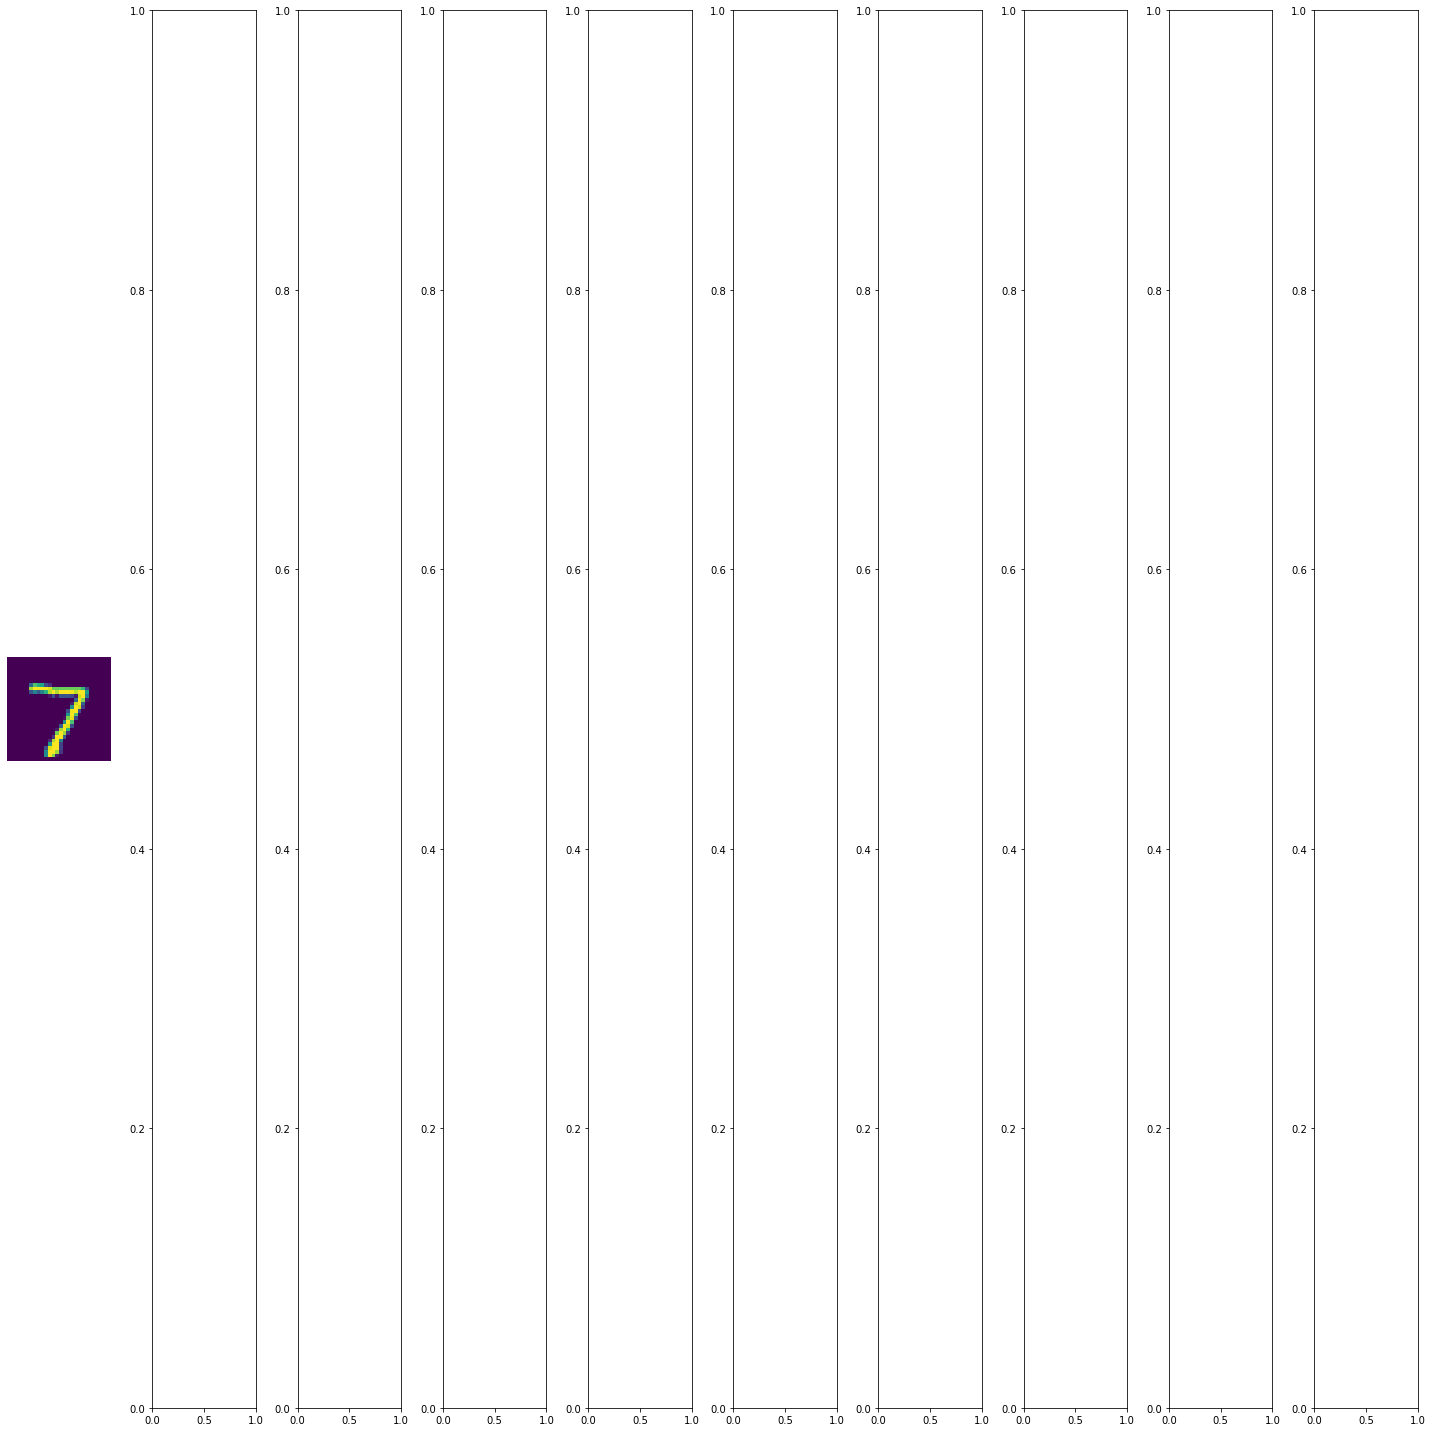

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [29]:
plotImages(x_test[0:10])

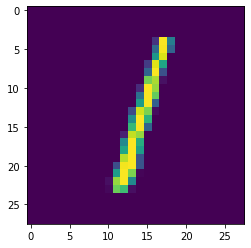

In [31]:
plt.imshow(x_test[2])

In [30]:
#predicting the model
predicted_y=clf.predict(x_test[0:10])
print(predicted_y)


1/1 [==============================] - 0s 6ms/step
[['7']
 ['2']
 ['1']
 ['0']
 ['4']
 ['1']
 ['4']
 ['9']
 ['5']
 ['9']]
